# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

In [2]:
data = pd.read_csv("assignment2_part1.csv")
data

,Unnamed: 0,x,y
0,0,-15.0,-2156.994097
1,1,-14.5,-1956.523904
2,2,-14.0,-1778.151738
3,3,-13.5,-1610.924846
4,4,-13.0,-1456.176307
5,5,-12.5,-1302.029411
6,6,-12.0,-1170.000646
7,7,-11.5,-1044.071813
8,8,-11.0,-917.935911
9,9,-10.5,-811.861672


### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

In [3]:
data1 = data.loc[:64] #Training set, 80% of 80 is 64 
data2 = data.loc[64:72] #Testing Set, 10% is 8
data3 = data.loc[72:80] #Validation set

### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

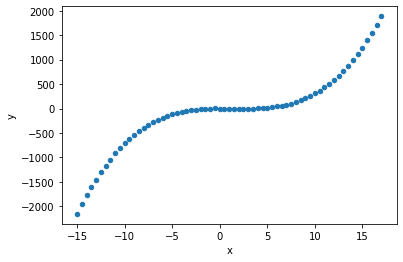

In [4]:
data1.plot(x = 'x', y = 'y', kind = 'scatter')

This looks roughly like a third degree polynomial, not a linear model

### Task 4: Visualize the regression fit

In [5]:
lm = smf.ols(formula='y~x', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     316.0
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           3.08e-26
Time:                        21:25:33   Log-Likelihood:                -468.25
No. Observations:                  65   AIC:                             940.5
Df Residuals:                      63   BIC:                             944.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.3147     41.223     -3.040      0.0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


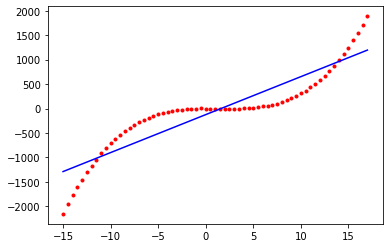

In [6]:
data1['ypred']=lm.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred,'b') #plot the regression

Not a great fit

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

In [7]:
data1['x3']=data1.x**3

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
lm_1 = smf.ols(formula='y~x3', data = data1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1666.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           4.95e-47
Time:                        21:25:34   Log-Likelihood:                -418.92
No. Observations:                  65   AIC:                             841.8
Df Residuals:                      63   BIC:                             846.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -172.4521     19.433     -8.874      0.0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


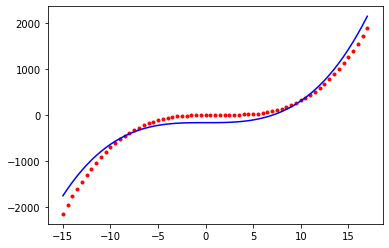

In [9]:
data1['ypred_1']=lm_1.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred_1,'b') #plot the regression

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

In [10]:
lm_ = smf.ols(formula='y~x+x3', data = data1).fit()
print(lm_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     876.7
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           3.43e-46
Time:                        21:25:34   Log-Likelihood:                -416.82
No. Observations:                  65   AIC:                             839.6
Df Residuals:                      62   BIC:                             846.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -168.9212     19.046     -8.869      0.0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


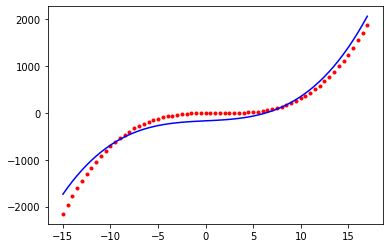

In [11]:
data1['ypred_']=lm_.predict() #predicted regression values
plt.plot(data1.x,data1.y,'.r') #plot the data
plt.plot(data1.x,data1.ypred_,'b') #plot the regression

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

In [12]:
M=12
for p in range(1,M+1): #add more powers of x up to 12'th
    data3['x{}'.format(p)]=data3.x**p
data3.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
72,72,21.0,3764.871416,21.0,441.00,9261.000,194481.0000,4.084101e+06,8.576612e+07,1.801089e+09,3.782286e+10,7.942800e+11,1.667988e+13,3.502775e+14,7.355828e+15
73,73,21.5,4064.435650,21.5,462.25,9938.375,213675.0625,4.594014e+06,9.877130e+07,2.123583e+09,4.565703e+10,9.816262e+11,2.110496e+13,4.537567e+14,9.755769e+15
74,74,22.0,4371.531453,22.0,484.00,10648.000,234256.0000,5.153632e+06,1.133799e+08,2.494358e+09,5.487587e+10,1.207269e+12,2.655992e+13,5.843183e+14,1.285500e+16
75,75,22.5,4704.656094,22.5,506.25,11390.625,256289.0625,5.766504e+06,1.297463e+08,2.919293e+09,6.568408e+10,1.477892e+12,3.325257e+13,7.481828e+14,1.683411e+16
76,76,23.0,5049.983454,23.0,529.00,12167.000,279841.0000,6.436343e+06,1.480359e+08,3.404825e+09,7.831099e+10,1.801153e+12,4.142651e+13,9.528098e+14,2.191462e+16


In [13]:
formula='y~x+'+'+'.join(['x{}'.format(p) for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12'

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.880e+04
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           3.47e-05
Time:                        21:25:35   Log-Likelihood:                -19.981
No. Observations:                   8   AIC:                             51.96
Df Residuals:                       2   BIC:                             52.44
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.298e-06   1.44e-05      0.368      0.7

Text(0, 0.5, 'y')

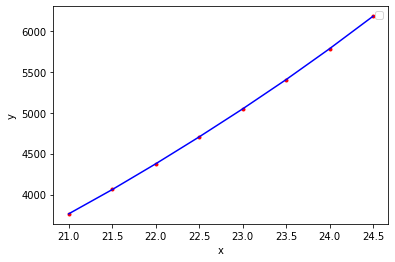

In [14]:
lm13 = smf.ols(formula=formula, data = data3).fit()
print(lm13.summary())
data3['ypred13']=lm13.predict() #predicted regression values
plt.plot(data3.x,data3.y,'.r') #plot the data
plt.plot(data3.x,data3.ypred13,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

perfect fit as expexted, sample is too small and it's overfit

### Task 8:Compute R2 over the validation data

In [15]:
R2 = []; Params = []
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x{}'.format(p) for p in range(2,M+1)]);
    #formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lmR = smf.ols(formula = formula, data = data3).fit()
    R2.append(lmR.rsquared)
    Params.append(lmR.params)

In [16]:
R2

[0.9978048007714655,
 0.9999812594784018,
 0.9999842763175982,
 0.9999854671286187,
 0.9999854770809855,
 0.9999854748122115,
 0.9999855032597067,
 0.9999855625929867,
 0.999985652649405,
 0.9999857734059571,
 0.9999859254149694,
 0.9999861103708825]

### Task 9: Did you get an optimal value with M=12?

M = 12 gives us the optimal R-Squared, but we run into the problem of overfitting

### Task 10:Perform degree selection over validation and test the best model.Visualize your findings.

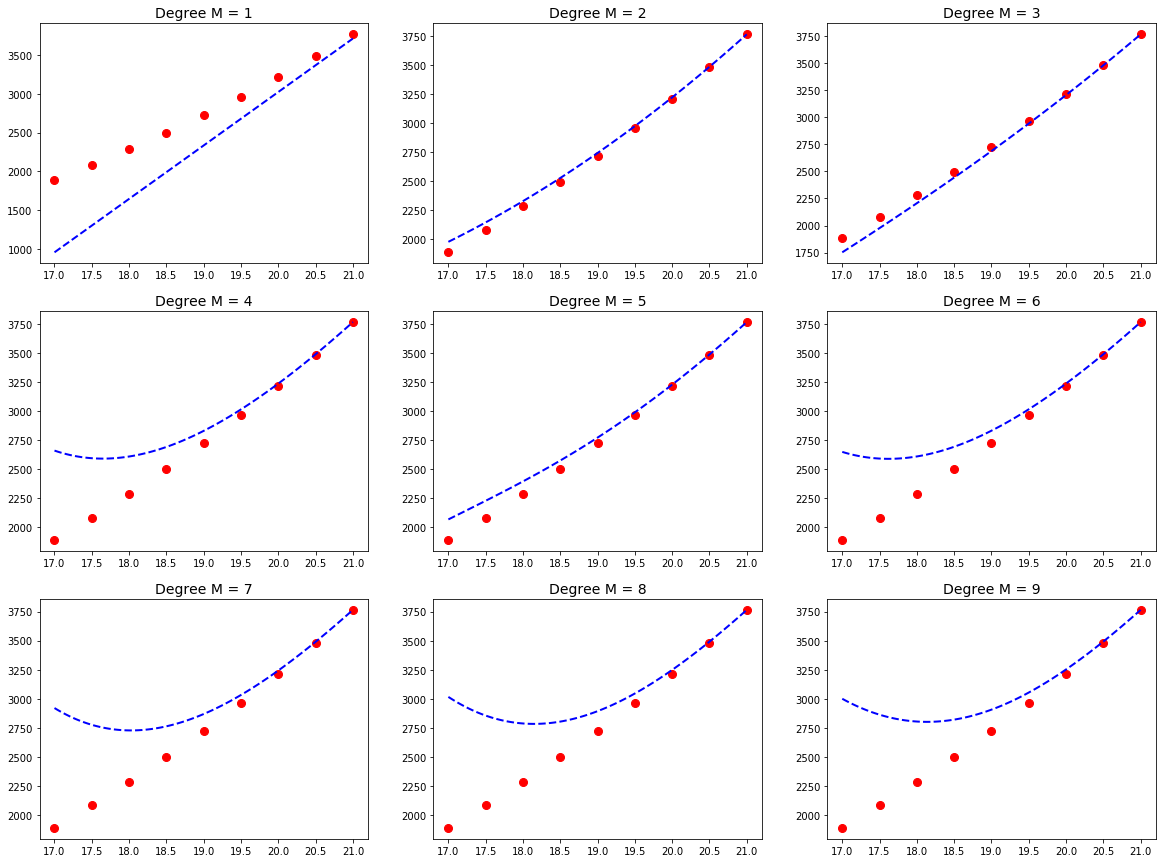

In [17]:
#visualize all the fits
plt.figure(figsize = (20,15))

for M in range(1,10):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(17,21,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(data2.x, data2.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

x = 3 looks like the best model

### Task 11:Generate regressors in the validation sample and compute the model prediction for optimal value of M that you found above.Visualize your results.

In [18]:
M=3
for p in range(1,M+1): #add more powers of x up to 12'th
    data2['x{}'.format(p)]=data2.x**p
data2.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,x,y,x1,x2,x3
64,64,17.0,1887.877609,17.0,289.00,4913.000
65,65,17.5,2081.877286,17.5,306.25,5359.375
66,66,18.0,2283.469520,18.0,324.00,5832.000
67,67,18.5,2497.509043,18.5,342.25,6331.625
68,68,19.0,2721.708052,19.0,361.00,6859.000


In [19]:
lm12 = smf.ols('y~x+x2+x3', data = data2).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.928e+05
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           1.83e-14
Time:                        21:25:39   Log-Likelihood:                -12.200
No. Observations:                   9   AIC:                             32.40
Df Residuals:                       5   BIC:                             33.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6045.6696   1818.113     -3.325      0.0

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


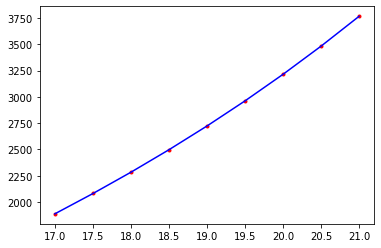

In [20]:
data2['ypred_']=lm12.predict() #predicted regression values
plt.plot(data2.x,data2.y,'.r') #plot the data
plt.plot(data2.x,data2.ypred_,'b') #plot the regression

## Problem 2:Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression vs Bachelor, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.

In [21]:
#Hint: you might want to use the dataframe "data4" in the session_05_02 diagnostics python notebook.
data4 = pd.read_csv('data/IncomeEduReg.csv')
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


In [22]:
data4['Advanced'] = data4.iloc[:,7:10].sum(axis=1)
data4['Other'] = data4.iloc[:,3:6].sum(axis=1)
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207,5138,5129
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149,5791,42420
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679,14399,8825
3,10004,98020.0,2279,29,87,305,984,550,86,238,874,421
4,10005,99633.0,5954,133,103,454,2745,1637,219,663,2519,690


In [23]:
data4.dropna(inplace = True)  #drop NAN to avoid invalid computation

In [24]:
data4['Income']=data4['IncomePerCapita']*data4['PopOver25'] #calculate total income

In [25]:
lm4 = smf.ols(formula = 'Income ~ Bachelor + Advanced + Other -1', data = data4).fit()
print(lm4.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1106.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   8.50e-115
Time:                        21:25:39   Log-Likelihood:                         -3804.4
No. Observations:                 181   AIC:                                      7615.
Df Residuals:                     178   BIC:                                      7624.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

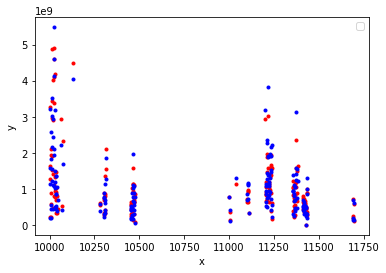

In [26]:
data4['Income_Predict'] = lm4.predict()
plt.plot(data4['Zipcode'],data4['Income'],'.r') #plot the data
plt.plot(data4['Zipcode'],data4['Income_Predict'],'.b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [27]:
#Your code here
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv') #Load crime data
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,...,SE_T006_001,SE_T006_002,SE_T006_003,SE_T006_004,SE_T007_001,SE_T007_002,SE_T007_003,SE_T007_004,SE_T008_001,SE_T009_001
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,870.114631,...,414,170.0,199.0,45.0,747.359870,306.886903,359.238198,81.234768,NaN,NaN
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,379.789217,...,662,230.0,405.0,27.0,330.816397,114.936210,202.387675,13.492512,NaN,NaN
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128,539.294083,...,128,68.0,55.0,5.0,476.066501,252.910328,204.559824,18.596348,NaN,NaN
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,382.120323,...,82,42.0,34.0,6.0,364.347285,186.616902,151.070826,26.659557,NaN,NaN
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1755.054661,...,923,311.0,524.0,88.0,1599.126804,538.817374,907.846636,152.462794,NaN,NaN


In [28]:
#rename some columns
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)


crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


In [29]:
msa = pd.read_csv('data/msalist.csv', encoding='latin1')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


In [30]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv', encoding = 'latin1')

In [31]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [32]:
demographics['Income']=demographics.Population*demographics['Per capita income']

In [33]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [34]:
msaDemo = demomsa.groupby(['msa', 'msa_name']).sum().loc[:,[u'Population', u'Area', u'Income']]

In [35]:
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [36]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [37]:
msacrime = crimemsa.groupby(['msa', 'msa_name']).sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]

In [38]:
msacrime.head()

,,Population,Crimes,Violent Crimes,Property Crimes
msa,msa_name,,,,
10180,"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430
10420,"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291
10500,"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257
10540,"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069
10580,"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499


In [39]:
msacrime.sort_values(by = ['Population'])

,,Population,Crimes,Violent Crimes,Property Crimes
msa,msa_name,,,,
38220,"Pine Bluff, AR (Metropolitan Statistical Area)",22419.0,167,4,163
31740,"Manhattan, KS (Metropolitan Statistical Area)",22897.0,221,37,184
49020,"Winchester, VA-WV (Metropolitan Statistical Area)",23483.0,109,41,68
46660,"Valdosta, GA (Metropolitan Statistical Area)",29794.0,363,33,330
15260,"Brunswick, GA (Metropolitan Statistical Area)",32631.0,881,42,839
19460,"Decatur, AL (Metropolitan Statistical Area)",33477.0,501,66,435
16180,"Carson City, NV (Metropolitan Statistical Area)",54522.0,1035,160,875
22520,"Florence-Muscle Shoals, AL (Metropolitan Statistical Area)",54543.0,494,58,436
45820,"Topeka, KS (Metropolitan Statistical Area)",55352.0,576,76,500


In [40]:
msaDemo.head()

,,Population,Area,Income
msa,msa_name,,,
10180,"Abilene, TX (Metropolitan Statistical Area)",167171,2743.478027,3740034900
10420,"Akron, OH (Metropolitan Statistical Area)",703017,900.129156,19560044574
10500,"Albany, GA (Metropolitan Statistical Area)",156706,1932.557130,3172077530
10540,"Albany, OR (Metropolitan Statistical Area)",118270,2290.129282,2526602010
10580,"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",875567,2811.554500,28078339939


In [41]:
crimemsa1 = msacrime.merge(msaDemo.Income, on = 'msa_name', left_index = True, how='inner')
crimemsa1.head()

,Population,Crimes,Violent Crimes,Property Crimes,Income
msa_name,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939


In [42]:
msacrime_ = crimemsa1.loc[(crimemsa1.Crimes  > 0)]

In [43]:
msacrime_.sort_values(by = ['Crimes'])

,Population,Crimes,Violent Crimes,Property Crimes,Income
msa_name,,,,,
"Altoona, PA (Metropolitan Statistical Area)",125955.0,1,1,0,3013749780
"Erie, PA (Metropolitan Statistical Area)",278443.0,2,0,2,6864634660
"Ocean City, NJ (Metropolitan Statistical Area)",95344.0,3,2,1,3225484714
"Allentown-Bethlehem-Easton, PA-NJ (Metropolitan Statistical Area)",407571.0,3,0,3,24289637683
"York-Hanover, PA (Metropolitan Statistical Area)",440755.0,5,5,0,12464331608
"Reading, PA (Metropolitan Statistical Area)",413691.0,5,5,0,11150605968
"Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)",300621.0,9,5,4,184043450222
"Pittsburgh, PA (Metropolitan Statistical Area)",2154097.0,17,12,5,71406600720
"Pocatello, ID (Metropolitan Statistical Area)",83347.0,65,7,58,1825578054


In [44]:
msacrime_['LogPop'] = np.log(msacrime_.Population)
msacrime_['LogTot'] = np.log(msacrime_.Crimes)
msacrime_['LogVio'] = np.log(msacrime_['Violent Crimes'])
msacrime_['LogProp'] = np.log(msacrime_['Property Crimes'])
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCo

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp
msa_name,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553


In [45]:
msacrime_['LogVio'] = msacrime_['LogVio'].replace([np.inf, -np.inf], np.nan)
msacrime_['LogProp'] = msacrime_['LogProp'].replace([np.inf, -np.inf], np.nan)
msacrime_['LogPop'] = msacrime_['LogPop'].fillna(0)
msacrime_['LogTot'] = msacrime_['LogTot'].fillna(0)
msacrime_['LogVio'] = msacrime_['LogVio'].fillna(0)
msacrime_['LogProp'] = msacrime_['LogProp'].fillna(0)
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp
msa_name,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553


In [46]:
msacrime_['LogVio'].min() #confirming code above worked

0.0

In [47]:
msacrime_.shape

(337, 9)

In [48]:
lmTot = smf.ols('LogTot ~ LogPop-1', data = msacrime_).fit()
lmTot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 LogTot   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          1.130e+04
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   1.02e-260
Time:                        21:25:41   Log-Likelihood:                         -550.45
No. Observations:                 337   AIC:                                      1103.
Df Residuals:                     336   BIC:                                      1107.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         0.5710      0.005    106.305      0.000       0.560       0.582
==============================================================================
Omnibus:                      201.199   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1739.584
Skew:                          -2.390   Prob(JB):                         0.00
Kurtosis:                      13.051   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lmTot.conf_int(alpha=0.05)

,0,1
LogPop,0.560459,0.581591


In [50]:
lmTot.conf_int(alpha=0.01)

,0,1
LogPop,0.55711,0.58494


We are 99% confident that q = 1 does not fall in this interval.

In [51]:
lmVio = smf.ols('LogVio ~ LogPop-1', data = msacrime_).fit()
lmVio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 LogVio   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              5451.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   9.77e-210
Time:                        21:25:42   Log-Likelihood:                         -550.65
No. Observations:                 337   AIC:                                      1103.
Df Residuals:                     336   BIC:                                      1107.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         0.3968      0.005     73.828      0.000       0.386       0.407
==============================================================================
Omnibus:                       34.336   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.382
Skew:                          -0.602   Prob(JB):                     4.69e-14
Kurtosis:                       4.710   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
lmVio.conf_int(alpha=0.05)

,0,1
LogPop,0.386233,0.407378


In [53]:
lmVio.conf_int(alpha=0.01)

,0,1
LogPop,0.382882,0.410729


We are 99% confident that q = 1 does not fall in this interval.

In [54]:
lmProp = smf.ols('LogProp ~ LogPop-1', data = msacrime_).fit()
lmProp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                LogProp   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              9567.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   6.09e-249
Time:                        21:25:42   Log-Likelihood:                         -571.70
No. Observations:                 337   AIC:                                      1145.
Df Residuals:                     336   BIC:                                      1149.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         0.5596      0.006     97.809      0.000       0.548       0.571
==============================================================================
Omnibus:                      227.702   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2437.438
Skew:                          -2.731   Prob(JB):                         0.00
Kurtosis:                      14.990   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lmProp.conf_int(alpha=0.05)

,0,1
LogPop,0.548327,0.570835


In [56]:
lmProp.conf_int(alpha=0.01)

,0,1
LogPop,0.54476,0.574402


We are 99% confident that q = 1 does not fall in this interval.

No handles with labels found to put in legend.


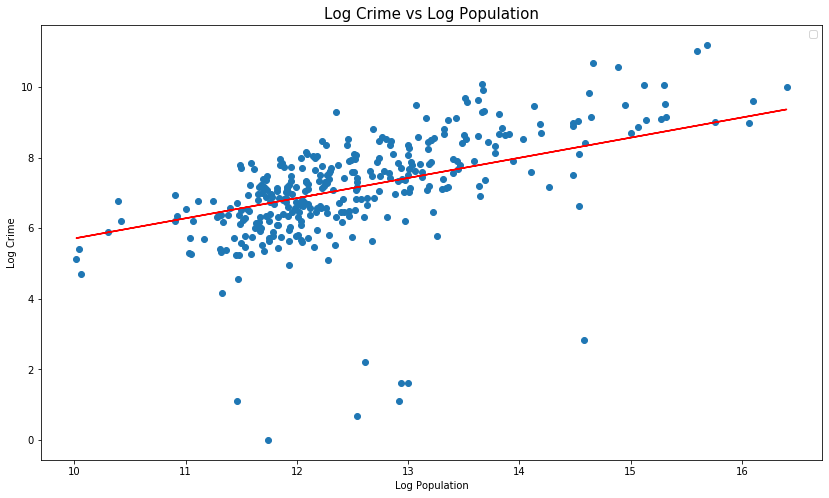

In [57]:
plt.figure(figsize=(14,8))
plt.plot(msacrime_['LogPop'], msacrime_['LogTot'], 'o')
plt.title('Log Crime vs Log Population', fontsize = 15)
plt.xlabel('Log Population')
plt.ylabel('Log Crime')
plt.plot(msacrime_['LogPop'], lmTot.predict(), '-r')
plt.legend()

In [58]:
msacrime_.sort_values(by = ['LogTot'])

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp
msa_name,,,,,,,,,
"Altoona, PA (Metropolitan Statistical Area)",125955.0,1,1,0,3013749780,11.743680,0.000000,0.000000,0.000000
"Erie, PA (Metropolitan Statistical Area)",278443.0,2,0,2,6864634660,12.536969,0.693147,0.000000,0.693147
"Ocean City, NJ (Metropolitan Statistical Area)",95344.0,3,2,1,3225484714,11.465247,1.098612,0.693147,0.000000
"Allentown-Bethlehem-Easton, PA-NJ (Metropolitan Statistical Area)",407571.0,3,0,3,24289637683,12.917970,1.098612,0.000000,1.098612
"York-Hanover, PA (Metropolitan Statistical Area)",440755.0,5,5,0,12464331608,12.996244,1.609438,1.609438,0.000000
"Reading, PA (Metropolitan Statistical Area)",413691.0,5,5,0,11150605968,12.932875,1.609438,1.609438,0.000000
"Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)",300621.0,9,5,4,184043450222,12.613606,2.197225,1.609438,1.386294
"Pittsburgh, PA (Metropolitan Statistical Area)",2154097.0,17,12,5,71406600720,14.582882,2.833213,2.484907,1.609438
"Pocatello, ID (Metropolitan Statistical Area)",83347.0,65,7,58,1825578054,11.330768,4.174387,1.945910,4.060443


No handles with labels found to put in legend.


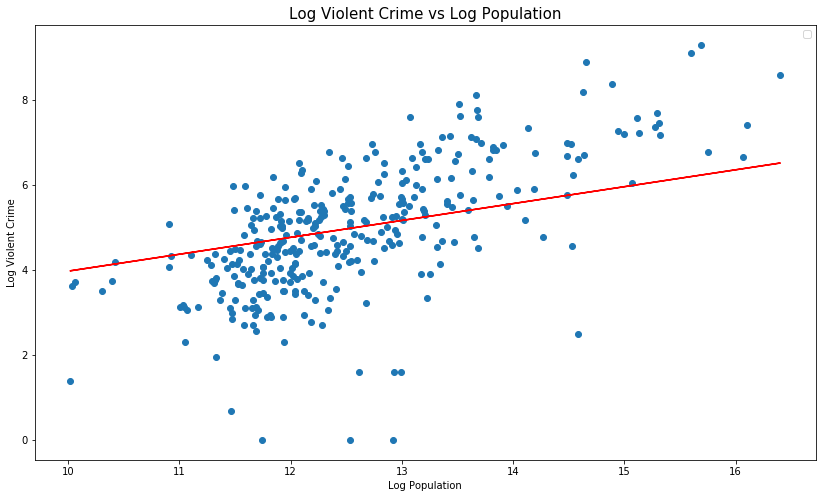

In [59]:
plt.figure(figsize=(14,8))
plt.plot(msacrime_['LogPop'], msacrime_['LogVio'], 'o')
plt.title('Log Violent Crime vs Log Population', fontsize = 15)
plt.xlabel('Log Population')
plt.ylabel('Log Violent Crime')
plt.plot(msacrime_['LogPop'], lmVio.predict(), '-r')
plt.legend()

No handles with labels found to put in legend.


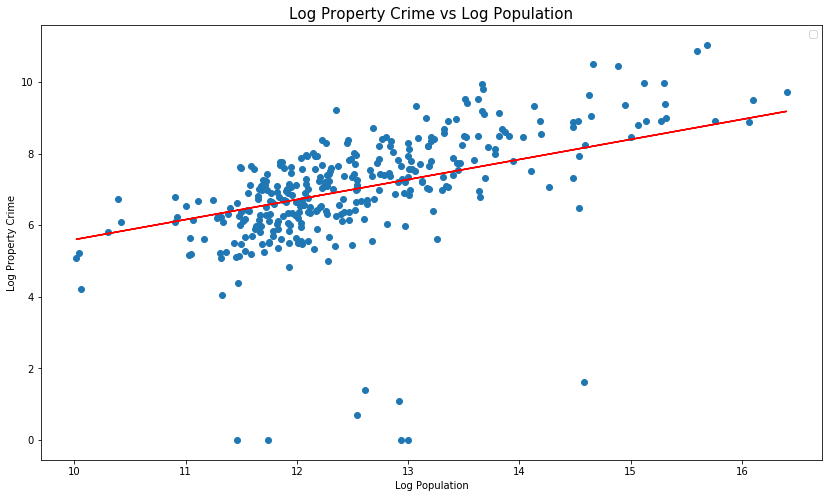

In [60]:
plt.figure(figsize=(14,8))
plt.plot(msacrime_['LogPop'], msacrime_['LogProp'], 'o')
plt.title('Log Property Crime vs Log Population', fontsize = 15)
plt.xlabel('Log Population')
plt.ylabel('Log Property Crime')
plt.plot(msacrime_['LogPop'], lmProp.predict(), '-r')
plt.legend()

### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [61]:
#plt.plot(lm.predict())
msacrime_['predicted crime'] = lmTot.predict()
msacrime_['logdiff'] = msacrime_['predicted crime']-msacrime_['LogTot']
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff
msa_name,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627


In [62]:
msacrime_.nlargest(5, 'logdiff')

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff
msa_name,,,,,,,,,,,
"Altoona, PA (Metropolitan Statistical Area)",125955.0,1,1,0,3013749780,11.743680,0.000000,0.000000,0.000000,6.705936,6.705936
"Erie, PA (Metropolitan Statistical Area)",278443.0,2,0,2,6864634660,12.536969,0.693147,0.000000,0.693147,7.158924,6.465777
"Allentown-Bethlehem-Easton, PA-NJ (Metropolitan Statistical Area)",407571.0,3,0,3,24289637683,12.917970,1.098612,0.000000,1.098612,7.376486,6.277873
"York-Hanover, PA (Metropolitan Statistical Area)",440755.0,5,5,0,12464331608,12.996244,1.609438,1.609438,0.000000,7.421182,5.811744
"Reading, PA (Metropolitan Statistical Area)",413691.0,5,5,0,11150605968,12.932875,1.609438,1.609438,0.000000,7.384996,5.775558


In [63]:
msacrime_.nsmallest(5, 'logdiff')

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff
msa_name,,,,,,,,,,,
"Orlando-Kissimmee-Sanford, FL (Metropolitan Statistical Area)",2321418.0,43637,7202,36435,55394204216,14.657689,10.683661,8.882114,10.503285,8.369909,-2.313752
"Greenville-Anderson-Mauldin, SC (Metropolitan Statistical Area)",862463.0,24316,3316,21000,20718989847,13.667548,10.098890,8.106515,9.952278,7.804513,-2.294377
"Macon-Bibb County, GA (Metropolitan Statistical Area)",230450.0,10881,869,10012,5075593274,12.347789,9.294773,6.767343,9.211540,7.050898,-2.243876
"Houston-The Woodlands-Sugar Land, TX (Metropolitan Statistical Area)",6490180.0,73010,10805,62205,183604231249,15.685801,11.198352,9.287764,11.038191,8.956986,-2.241365
"Miami-Fort Lauderdale-West Palm Beach, FL (Metropolitan Statistical Area)",5929819.0,61438,8873,52565,157318026642,15.595504,11.025784,9.090768,10.869806,8.905425,-2.120359


### Task 3:Is there any correlation between residual by income and residual by crime?

In [64]:
lmIn = smf.ols('Income ~ Population-1', data = msacrime_).fit()
lmIn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              1448.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                   7.73e-124
Time:                        21:25:43   Log-Likelihood:                         -8561.4
No. Observations:                 337   AIC:                                  1.712e+04
Df Residuals:                     336   BIC:                                  1.713e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  3.669e+04    964.228     38.048      0.000    3.48e+04    3.86e+04
==============================================================================
Omnibus:                      546.223   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178403.028
Skew:                           8.664   Prob(JB):                         0.00
Kurtosis:                     114.378   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
msacrime_['logIn'] = np.log(msacrime_['Income'])
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn
msa_name,,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944,22.042361
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528,23.696755
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154,21.877653
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559,21.650141
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627,24.058264


In [66]:
lmIn_ = smf.ols('logIn ~ LogPop-1', data = msacrime_).fit()
lmIn_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  logIn   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.768e+05
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                        0.00
Time:                        21:25:43   Log-Likelihood:                         -476.48
No. Observations:                 337   AIC:                                      955.0
Df Residuals:                     336   BIC:                                      958.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         1.8133      0.004    420.424      0.000       1.805       1.822
==============================================================================
Omnibus:                       27.259   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.206
Skew:                           0.308   Prob(JB):                     1.04e-17
Kurtosis:                       5.278   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
msacrime_['PredIncome'] = lmIn_.predict()
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome
msa_name,,,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944,22.042361,21.822959
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528,23.696755,24.414188
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154,21.877653,21.631163
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559,21.650141,21.196713
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627,24.058264,24.819600


In [68]:
msacrime_.corr()

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome
Population,1.000000,0.593422,0.606605,0.587804,0.885420,0.749553,0.435110,0.480098,0.413550,0.749553,-0.153047,0.719114,0.749553
Crimes,0.593422,1.000000,0.971374,0.999183,0.446406,0.581833,0.595683,0.629352,0.574478,0.581833,-0.431308,0.534833,0.581833
Violent Crimes,0.606605,0.971374,1.000000,0.960980,0.438314,0.552549,0.549260,0.617181,0.524511,0.552549,-0.389680,0.501675,0.552549
Property Crimes,0.587804,0.999183,0.960980,1.000000,0.445244,0.583506,0.600193,0.627843,0.579711,0.583506,-0.435938,0.537433,0.583506
Income,0.885420,0.446406,0.438314,0.445244,1.000000,0.644956,0.325171,0.365580,0.306182,0.644956,-0.072054,0.702845,0.644956
LogPop,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000
LogTot,0.435110,0.595683,0.549260,0.600193,0.325171,0.592872,1.000000,0.926448,0.995436,0.592872,-0.915662,0.517358,0.592872
LogVio,0.480098,0.629352,0.617181,0.627843,0.365580,0.656661,0.926448,1.000000,0.898551,0.656661,-0.794708,0.573202,0.656661
LogProp,0.413550,0.574478,0.524511,0.579711,0.306182,0.561762,0.995436,0.898551,1.000000,0.561762,-0.925660,0.488220,0.561762
predicted crime,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000


In [69]:
msacrime_['logdiffIn'] = msacrime_['PredIncome']-msacrime_['logIn']
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome,logdiffIn
msa_name,,,,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944,22.042361,21.822959,-0.219402
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528,23.696755,24.414188,0.717434
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154,21.877653,21.631163,-0.246490
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559,21.650141,21.196713,-0.453428
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627,24.058264,24.819600,0.761335


In [70]:
msacrime_.corr()

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome,logdiffIn
Population,1.000000,0.593422,0.606605,0.587804,0.885420,0.749553,0.435110,0.480098,0.413550,0.749553,-0.153047,0.719114,0.749553,0.626147
Crimes,0.593422,1.000000,0.971374,0.999183,0.446406,0.581833,0.595683,0.629352,0.574478,0.581833,-0.431308,0.534833,0.581833,0.513911
Violent Crimes,0.606605,0.971374,1.000000,0.960980,0.438314,0.552549,0.549260,0.617181,0.524511,0.552549,-0.389680,0.501675,0.552549,0.495486
Property Crimes,0.587804,0.999183,0.960980,1.000000,0.445244,0.583506,0.600193,0.627843,0.579711,0.583506,-0.435938,0.537433,0.583506,0.514123
Income,0.885420,0.446406,0.438314,0.445244,1.000000,0.644956,0.325171,0.365580,0.306182,0.644956,-0.072054,0.702845,0.644956,0.438511
LogPop,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000,0.883111
LogTot,0.435110,0.595683,0.549260,0.600193,0.325171,0.592872,1.000000,0.926448,0.995436,0.592872,-0.915662,0.517358,0.592872,0.556598
LogVio,0.480098,0.629352,0.617181,0.627843,0.365580,0.656661,0.926448,1.000000,0.898551,0.656661,-0.794708,0.573202,0.656661,0.616270
LogProp,0.413550,0.574478,0.524511,0.579711,0.306182,0.561762,0.995436,0.898551,1.000000,0.561762,-0.925660,0.488220,0.561762,0.529765
predicted crime,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000,0.883111


There is a correlation of -0.233576